## Machine Learning and Regression Analysis

## Contents:

### 1. Importing libraries and data
### 2. Data prep for regression analysis
### 3. Regression analysis
### 4. Discussion

## 1. Importing libraries and data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# Ensures that the graphs display in notebook
%matplotlib inline

In [10]:
#Establish file path
path = r'/Users/caitlin/iCloud/Caitlin/COVID Data/Prepared Data'

In [11]:
path

'/Users/caitlin/iCloud/Caitlin/COVID Data/Prepared Data'

In [26]:
df = pd.read_csv(os.path.join(path,'COVID_death_case_mandate_by_state.csv'))

In [27]:
# Show all rows
pd.options.display.max_rows = None

In [28]:
# Show all columns
pd.options.display.max_columns = None

In [29]:
df.head(5)

,Unnamed: 0,date,state,home_yes_count,home_no_count,home_recommend_count,yes_mask_count,no_mask_count,avg_per_100K,Total Cases,New Cases,Total Deaths,New Deaths,State
0,0,2020-04-10,Alabama,67.0,NaN,NaN,NaN,67.0,49.177000,3103,158,141,12,Alabama
1,1,2020-04-10,Alaska,29.0,NaN,NaN,NaN,29.0,2.027000,246,11,9,0,Alaska
2,2,2020-04-10,Arizona,15.0,NaN,NaN,NaN,15.0,31.366800,3112,94,97,8,Arizona
3,3,2020-04-10,Arkansas,NaN,75.0,NaN,NaN,75.0,23.702227,1202,75,24,3,Arkansas
4,4,2020-04-10,California,58.0,NaN,NaN,NaN,58.0,11.686698,19472,1163,541,49,California


In [30]:
# Delete unneeded columns
df = df.drop(columns = ['Unnamed: 0'],)

In [31]:
df.head(5)

,date,state,home_yes_count,home_no_count,home_recommend_count,yes_mask_count,no_mask_count,avg_per_100K,Total Cases,New Cases,Total Deaths,New Deaths,State
0,2020-04-10,Alabama,67.0,NaN,NaN,NaN,67.0,49.177000,3103,158,141,12,Alabama
1,2020-04-10,Alaska,29.0,NaN,NaN,NaN,29.0,2.027000,246,11,9,0,Alaska
2,2020-04-10,Arizona,15.0,NaN,NaN,NaN,15.0,31.366800,3112,94,97,8,Arizona
3,2020-04-10,Arkansas,NaN,75.0,NaN,NaN,75.0,23.702227,1202,75,24,3,Arkansas
4,2020-04-10,California,58.0,NaN,NaN,NaN,58.0,11.686698,19472,1163,541,49,California


In [32]:
df.tail(5)

,date,state,home_yes_count,home_no_count,home_recommend_count,yes_mask_count,no_mask_count,avg_per_100K,Total Cases,New Cases,Total Deaths,New Deaths,State
12643,2020-12-13,Virginia,NaN,95.0,NaN,95.0,NaN,349.022091,285149,3240,4414,3,Virginia
12644,2020-12-13,Washington,NaN,NaN,39.0,39.0,NaN,302.859649,206952,3561,2879,0,Washington
12645,2020-12-13,West Virginia,NaN,NaN,55.0,55.0,NaN,441.803000,63217,1066,968,2,West Virginia
12646,2020-12-13,Wisconsin,NaN,NaN,72.0,72.0,NaN,483.545535,468956,2965,4339,15,Wisconsin
12647,2020-12-13,Wyoming,NaN,23.0,NaN,NaN,23.0,495.254700,39360,453,321,0,Wyoming


## 2. Data prep for regression analysis 

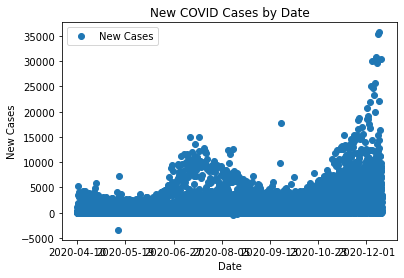

In [34]:
# Scatterplot of dates and COVID cases

df.plot(x = 'date', y='New Cases',style='o') 
plt.title('New COVID Cases by Date')  
plt.xlabel('Date')  
plt.ylabel('New Cases')  
plt.show()

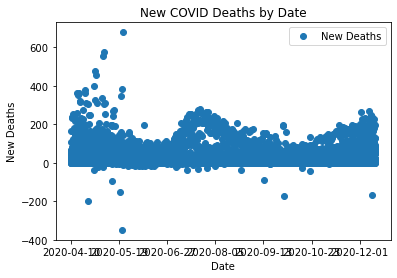

In [35]:
# Scatterplot of deaths by date

df.plot(x = 'date', y='New Deaths',style='o') 
plt.title('New COVID Deaths by Date')  
plt.xlabel('Date')  
plt.ylabel('New Deaths')  
plt.show()

It is interesting to see that in the beginning, the death rate was really high, while later the death rate dropped (likely after medical professionals learned more about COVID) and the case rate when up.

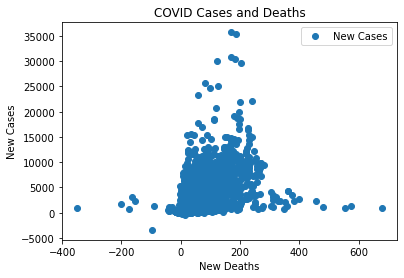

In [37]:
# Scatterplot of death by cases

df.plot(x = 'New Deaths', y='New Cases',style='o') 
plt.title('COVID Cases and Deaths')  
plt.xlabel('New Deaths')  
plt.ylabel('New Cases')  
plt.show()

In [39]:
# Reshape the variables into NumPy arrays and put them into separate objects
X = df['New Deaths'].values.reshape(-1,1) #Independent Variable
y = df['New Cases'].values.reshape(-1,1) #Dependent Variable

In [40]:
X

array([[12],
       [ 0],
       [ 8],
       ...,
       [ 2],
       [15],
       [ 0]])

In [41]:
y

array([[ 158],
       [  11],
       [  94],
       ...,
       [1066],
       [2965],
       [ 453]])

In [42]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

#### Hypothesis

Null Hypothesis: The COVID death rate is equal to or less than the COVID case rate.
Alternate Hypothesis: The COVID death rate is higher than the COVID case rate.

## 3. Regression analysis

### Regression: COVID Cases and Deaths

In [43]:
# Create a regression object.

regression = LinearRegression() 

In [44]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [45]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

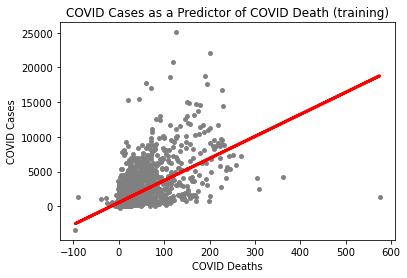

In [46]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('COVID Cases as a Predictor of COVID Death (training)')
plot_test.xlabel('COVID Deaths')
plot_test.ylabel('COVID Cases')
plot_test.show()

In [47]:
# Create objects that contain the model summary statistics.
rmse = mean_squared_error(y_test, y_predicted) 
r2 = r2_score(y_test, y_predicted) 

In [48]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[31.7244972]]
Mean squared error:  2627326.8029031362
R2 score:  0.4167764588150765


In [49]:
y_predicted

array([[2771.04089492],
       [1406.88751519],
       [ 708.94857673],
       ...,
       [1184.81603477],
       [3373.80634177],
       [ 582.05058791]])

In [50]:
# Create a dataframe comparing the actual and predicted values of y.
data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,2311,2771.040895
1,1009,1406.887515
2,465,708.948577
3,525,2485.520420
4,7537,2834.489889
5,2538,613.775085
6,463,899.295560
7,282,677.224080
8,945,1279.989526
9,895,867.571063


##### Compare how the regression fits the training set

In [51]:
# Predict.
y_predicted_train = regression.predict(X_train) 

In [52]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [53]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[31.7244972]]
Mean squared error:  2947266.3935890063
R2 score:  0.34176451720159895


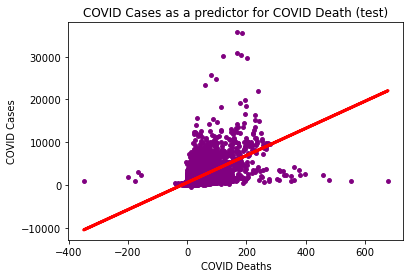

In [54]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='purple', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('COVID Cases as a predictor for COVID Death (test)')
plot_test.xlabel('COVID Deaths')
plot_test.ylabel('COVID Cases')
plot_test.show()

## 4. Discussion

The regression graphs indicate a positive relationship between COVID deaths and COVID cases - that is as the number of COVID cases rise, so does the death rate. This is the underlying justification for mask and stay at home mandates. 

The slope indicates that for every 35 COVID cases, there is one additional death. The MSE is very high, however, so the accuracy is quite low. Further the R2 of 0.34 indicates a weak relationship. Both suggest regression is not a good fit for this data set.

It does bring out an interesting question, however. Often the justification for mandates, as stated above, is that more cases lead to more deaths - therefore mandates should be in place to prevent death. This graph, however, illustrates that this is not actually the case. It suggests that preventing COVID deaths does not lie in preventing cases alone.